In [0]:
import numpy as np
import numpy.linalg as la

from scipy.stats import moment, t

from sklearn.svm import SVC

import matplotlib.pyplot as plt


import time

# Section 2.2

We use computer simulations to compare the performance of the classifiers. We generate ${\bf x}_{ij} - {\boldsymbol \mu}_i, \ j = 1, 2, \ldots, (i = 1, 2)$ independently from a pseudorandom p-variate t-distribution, $t_p({\bf 0}, {\boldsymbol \Sigma}_i, \nu)$ with mean zero, covariance matrix ${\boldsymbol \Sigma}_i$ and degrees of freedom $\nu$. 

We set ${\boldsymbol \mu}_2 = {\bf 0}, \ {\boldsymbol \Sigma}_1 = c_1{\bf B}(0.3^{|i - j|^{1/3}}){\bf B}$ and ${\boldsymbol \Sigma}_2 = c_2{\bf B}(0.3^{|i - j|^{1/3}}){\bf B}$, where ${\bf B} = \mathrm{diag} \left[\{0.5 + 1 \ / \  (p + 1)\}^{1/2}, \ldots, \{0.5 + p \ /  \ (p + 1)\}^{1/2} \right]$. We consider two cases for ${\boldsymbol \mu}_1$ : (a) $ {\boldsymbol \mu}_1 = (1, \ldots, 1, 0, \ldots, 0)^T$ whose first $\lceil p^{2/3} \rceil$ elements are 1, and (b) : $\mu_1 = (0, \ldots, 0, 1, \ldots, 1)^T$ whose last $\lceil p^{2/3} \rceil$ elements are 1.

We consider three cases :

$(Ⅰ) \ p=2^s,\ s=5,\ldots,10, \ (n_1,n_2)=(10, 20), \ (c_1, c_2) = (1, 1) $ and $\nu=25$  for (a) and (b);
$(Ⅱ) \ p = 2^s, \ s = 5,\ldots, 10,  \ (n_1, n_2) = (10, 20), \  (c_1, c_2) =(0.8, 1.2)$ and $\nu = 25$ for (b) \
$(Ⅲ) \ p=500, \ (n_1, n_2)=(10, 20), \ (c_1, c_2)=(0.8, 1.2) $ and $\nu = 10(10)60$ for (b)

\
Let ${\bf x}_0$ be an observation vector. We estimate ${\boldsymbol \mu}_i$ and ${\boldsymbol \Sigma}_i$ by $\overline{{\bf x}}_{in_i} = \sum_{j=1}^{n_i}{\bf x}_{ij} \ / \ n_i $ and ${\bf S}_{in_i} = \sum_{j = 1}^{n_i} ({\bf x}_{ij} - \overline{{\bf x}}_{in_i}) ({\bf x}_{ij} - \overline{{\bf x}}_{in_i})^T \ / \ (n_i - 1)$ for $i = 1, 2$



We compare the follow classifiers: \
one classifiers an individual into $\pi_1$ if \
DBDA : $\left({\bf x}_0 - \frac{\overline{{\bf x}}_{1n_1} + \overline{{\bf x}}_{2n_2}}{2} \right)^T \left( \overline{{\bf x}}_{2n_2} - \overline{{\bf x}}_{1n_1} \right) - \frac{\mathrm{tr}\left({\bf S}_{1n_1}\right)}{2n_1} + \frac{\mathrm{tr}\left({\bf S}_{2n_2}\right)}{2n_2} < 0$ 

GQDA : $\frac{p||{\bf x}_0 - \overline{{\bf x}}_{1n_1}||^2}{\mathrm{tr}\left({\bf S}_{1n_1}\right)} - \frac{p||{\bf x}_0 - \overline{{\bf x}}_{2n_2}||^2}{\mathrm{tr}\left({\bf S}_{2n_2}\right)} - p\log\left\{ \frac{\mathrm{tr}\left({\bf S}_{2n_2} \right)}{\mathrm{tr}\left({\bf S}_{2n_2} \right)} \right\} - \frac{p}{n_1} + \frac{p}{n_2} < 0$ 

DLDA : $\{{\bf x}_0 - (\overline{{\bf x}}_{1n_1} + \overline{{\bf x}}_{2n_2}) \ / \ 2\}^T {\bf S}_d^{-1} (\overline{{\bf x}}_{2n_2} - \overline{{\bf x}}_{1n_1}) < 0$, where ${\bf S}_d = \mathrm{diag}(s_{1n}, \ldots, s_{pn}), \ s_{in} = \sum_{i=1}^2 \sum_{l=1}^{n_i}(x_{ijl} - \overline{x}_{ijn_i})^2 \ / \ (n_1 + n_2 -2) $

DQDA : $({\bf x}_0 - \overline{{\bf x}}_{1n_1})^T {\bf S}_{d(1)}^{-1} ({\bf x}_0 - \overline{{\bf x}}_{1n_1}) - ({\bf x}_0 - \overline{{\bf x}}_{2n_2})^T {\bf S}_{d(2)}^{-1} ({\bf x}_0 - \overline{{\bf x}}_{2n_2}) - \log\left\{\frac{\mathrm{det} \left({\bf S}_{d(2)} \right)}{\mathrm{det} \left({\bf S}_{d(1)} \right)} \right\} < 0$, where ${\bf S}_{d(i)} = \mathrm{diag}(s_{(i)1n_i}, \ldots, s_{(i)pn_i})$ and $s_{(i)jn_i} = \sum_{l=1}^{n_i}(x_{ijl} - \overline{x}_{ijn_i})^2 \ / \ (n_i-1)$

HM-LSVM : The hard-margin linear support vector machine

## Figure1


(a)：$\mu_1 = (1, \ldots, 1, 0, \ldots, 0)^T$

(b)：$\mu_1 = (0, \ldots, 0, 1, \ldots, 1)^T$

$(Ⅰ)\ p=2^s,\ s=5,\ldots,10, \ (n_1,n_2)=(10, 20), \ (c_1, c_2) = (1, 1) $ and $\nu=25$  for (a) and (b)

In [0]:
np.random.seed(0)
t1 = time.time()
n = [10, 10]
c = [1, 1]
df = 25

N_class = 2
N_dim = 6
N_classifier = 5
iter = 2000

y = [-1] * n[0] + [1] * n[1]

mo = t.stats(df, moments='mv')
svm = SVC(C=float('inf'), kernel='linear')

result_a = np.zeros((N_dim, N_classifier, N_class))
result_b = np.zeros((N_dim, N_classifier, N_class))

result = [result_a, result_b]

for s in range(N_dim):
  p = 2**(s+5)
  print('Dimension:{}'.format(p))
  print('Calculating...')

  mu_a, mu_b = [], []
  mu_a.append(np.r_[np.ones(int(np.ceil(p**(2/3)))), np.zeros(p - int(np.ceil(p**(2/3))))])
  mu_a.append(np.zeros(p))

  mu_b.append(np.r_[np.zeros(int(p - int(np.ceil(p**(2/3))))), np.ones(int(np.ceil(p**(2/3))))])
  mu_b.append(np.zeros(p))

  mu = [mu_a, mu_b]

  S = np.zeros((p, p))
  for i in range(p):
    for j in range(p):
      S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)

  Sigma=[]
  for i in range(N_class):
    Sigma.append(c[i] * S)


  P, Q = [], []
  for i in range(N_class):
    value, vec = la.eig(Sigma[i])
    P.append(np.sqrt(value)); Q.append(vec.T)

  for ab in range(2):
    for l in range(iter):
      x, trS, mean = [], [], []
      diag = []
      Y = []
      for i in range(N_class):
        Z = np.array([P[i] * (np.random.normal(0, 1, p)) for j in range(n[i])])
        X = np.dot(Z, Q[i]) / np.sqrt(np.random.chisquare(df, n[i]) / df).reshape(n[i], -1) + mu[ab][i]
        Y.append(X)
        cov = np.cov(X, rowvar=False)
        trS.append(np.trace(cov))
        mean.append(np.mean(X, axis=0))
        diag.append(np.diag(cov))

        # creat new date
        z = P[i] * (np.random.normal(0, 1, p))
        x.append(np.dot(z, Q[i])  / np.sqrt(np.random.chisquare(df, 1) / df) + mu[ab][i])



      #(3)DBDA
      for i in range(N_class):
        classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
        if (-1)**i * classifier < 0:
          result[ab][s, 0, i] += 1


      #(6)GQDA
      for i in range(N_class):
        classifier = p * la.norm(x[i] - mean[0])**2 / trS[0] - p * la.norm(x[i] - mean[1])**2 / trS[1] - p * np.log(trS[1] / trS[0]) - p / n[0] + p / n[1]
        if (-1)**i * classifier < 0:
          result[ab][s, 1, i] += 1

      #DLDA
      S_d_inv = np.diag((((n[0] - 1) * diag[0] + (n[1] - 1) * diag[1]) / (n[0] + n[1] - 2))**(-1))
      for i in range(N_class):
        classifier = np.einsum('i, ij, j', x[i] - (mean[0] + mean[1]) / 2, S_d_inv, mean[1] - mean[0])
        if (-1)**i * classifier < 0:
          result[ab][s, 2, i] +=1

      #DQDA
      S_d0_inv = np.diag(diag[0]**(-1)); S_d1_inv = np.diag(diag[1]**(-1))
      for i in range(N_class):
        classifier = np.einsum('i, ij, j', x[i] - mean[0], S_d0_inv, x[i] - mean[0]) - np.einsum('i, ij, j', x[i] - mean[1], S_d1_inv, x[i] - mean[1]) \
                            - np.sum(np.log(diag[1])) + np.sum(np.log(diag[0]))
        if (-1)**i * classifier < 0:
          result[ab][s, 3, i] += 1

      #HM-LSVM
      Y = np.r_[Y[0], Y[1]]
      svm.fit(Y, y)
      for i in range(N_class):
        classifier = svm.predict([x[i]])
        if (-1)**i * classifier < 0:
          result[ab][s, 4, i] += 1
  print('Result')
  print('DBDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 0, 0], result[0][s, 0, 1], result[1][s, 0, 0], result[1][s, 0, 1]))
  print('GQDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 1, 0], result[0][s, 1, 1], result[1][s, 1, 0], result[1][s, 1, 1]))
  print('DLDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 2, 0], result[0][s, 2, 1], result[1][s, 2, 0], result[1][s, 2, 1]))
  print('DQDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 3, 0], result[0][s, 3, 1], result[1][s, 3, 0], result[1][s, 3, 1]))
  print('HM-LSVM: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 4, 0], result[0][s, 4, 1], result[1][s, 4, 0], result[1][s, 4, 1]))
  print('Finished')
  print('')

t2 = time.time() - t1
print('Calcultion time:{: .3f}'.format(t2))

Dimension:32
Calculating...
Result
DBDA: (a)(class1, class2) = (1658.0, 1689.0),  (b)(class1, class2) = (1534.0, 1537.0)
GQDA: (a)(class1, class2) = (1648.0, 1667.0),  (b)(class1, class2) = (1534.0, 1537.0)
DLDA: (a)(class1, class2) = (1690.0, 1727.0),  (b)(class1, class2) = (1534.0, 1537.0)
DQDA: (a)(class1, class2) = (1645.0, 1650.0),  (b)(class1, class2) = (1534.0, 1537.0)
HM-LSVM: (a)(class1, class2) = (1609.0, 1617.0),  (b)(class1, class2) = (1534.0, 1537.0)
Finished

Dimension:64
Calculating...
Result
DBDA: (a)(class1, class2) = (1679.0, 1704.0),  (b)(class1, class2) = (1542.0, 1586.0)
GQDA: (a)(class1, class2) = (1681.0, 1674.0),  (b)(class1, class2) = (1542.0, 1586.0)
DLDA: (a)(class1, class2) = (1755.0, 1760.0),  (b)(class1, class2) = (1542.0, 1586.0)
DQDA: (a)(class1, class2) = (1696.0, 1703.0),  (b)(class1, class2) = (1542.0, 1586.0)
HM-LSVM: (a)(class1, class2) = (1654.0, 1700.0),  (b)(class1, class2) = (1542.0, 1586.0)
Finished

Dimension:128
Calculating...
Result
DBDA: (a

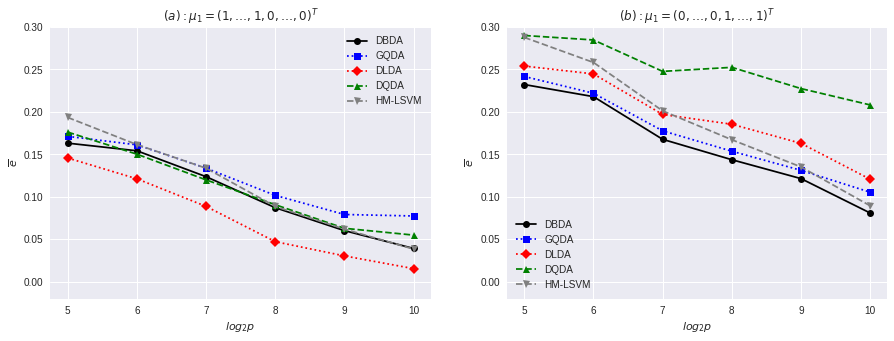

In [0]:
error_left = np.zeros((N_classifier, N_dim))
error_right = np.zeros((N_classifier, N_dim))
for i in range(N_dim):
  for j in range(N_classifier):
    error_left[j, i] = 1 - (result[0][i, j, 0] + result[0][i, j, 1]) / (2*iter)
    error_right[j, i] = 1 - (result[1][i, j, 0] + result[1][i, j, 1]) / (2*iter)

    
pl = np.arange(5, 11, 1)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(pl, error_left[0], 'o-', color='black', label='DBDA')
ax1.plot(pl, error_left[1], 's:', color='blue', label='GQDA')
ax1.plot(pl, error_left[2], 'D:', color='red', label='DLDA')
ax1.plot(pl, error_left[3], '^--', color='green', label='DQDA')
ax1.plot(pl, error_left[4], 'v--', color='gray', label='HM-LSVM')
ax1.set_ylim(-0.02, 0.3)
ax1.set_ylabel('$\overline{e}$')
ax1.set_xlabel('$log_2p$')
ax1.set_title('$(a):\mu_1 = (1, \ldots, 1, 0, \ldots, 0)^T$')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(pl, error_right[0], 'o-', color='black', label='DBDA')
ax2.plot(pl, error_right[1], 's:', color='blue', label='GQDA')
ax2.plot(pl, error_right[2], 'D:', color='red', label='DLDA')
ax2.plot(pl, error_right[3], '^--', color='green', label='DQDA')
ax2.plot(pl, error_right[4], 'v--', color='gray', label='HM-LSVM')
ax2.set_ylim(-0.02, 0.3)
ax2.set_ylabel('$\overline{e}$')
ax2.set_xlabel('$log_2p$')
ax2.set_title('$(b):\mu_1 = (0, \ldots, 0, 1, \ldots, 1)^T$')
ax2.legend()

plt.show()



## Figure2

(b): $\mu_1= (0,\ldots,0, 1,\ldots, 1)^T $

$(II)\ p = 2^s, s = 5,\ldots, 10, (n_1, n_2) = (10, 20), (c_1, c_2) =(0.8, 1.2)$ and $ν = 25$ for (b)

In [2]:
np.random.seed(0)
t1 = time.time()
n = [10, 20]
c = [0.8, 1.2]
df = 25

N_class = 2
N_dim = 6
N_classifier = 5
iter = 2000

y = [-1] * n[0] + [1] * n[1]

mo = t.stats(df, moments='mv')
svm = SVC(C=float('inf'), kernel='linear')

result = np.zeros((N_dim, N_classifier, N_class))


for s in range(N_dim):
  p = 2**(s+5)
  print('Dimension:{}'.format(p))
  print('Calculating...')

  mu = []
  mu.append(np.r_[np.zeros(p - int(np.ceil(p**(2/3)))), np.ones(int(np.ceil(p**(2/3))))])
  mu.append(np.zeros(p))

  S = np.zeros((p, p))
  for i in range(p):
    for j in range(p):
      S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)

  Sigma=[]
  for i in range(N_class):
    Sigma.append(c[i] * S)


  P, Q = [], []
  for i in range(N_class):
    value, vec = la.eig(Sigma[i])
    P.append(np.sqrt(value)); Q.append(vec.T)


  for l in range(iter):
    x, trS, mean = [], [], []
    diag = []
    Y = []
    for i in range(N_class):
      Z = np.array([P[i] * (np.random.normal(0, 1, p)) for j in range(n[i])])
      X = np.dot(Z, Q[i]) / np.sqrt(np.random.chisquare(df, n[i]) / df).reshape(n[i], -1) + mu[i]
      Y.append(X)
      cov = np.cov(X, rowvar=False)
      trS.append(np.trace(cov))
      mean.append(np.mean(X, axis=0))
      diag.append(np.diag(cov))
      
      # creat new date
      z = P[i] * (np.random.normal(0, 1, p))
      x.append(np.dot(z, Q[i])  / np.sqrt(np.random.chisquare(df, 1) / df) + mu[i])



    #(3)DBDA
    for i in range(N_class):
      classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
      if (-1)**i * classifier < 0:
        result[s, 0, i] += 1


    #(6)GQDA
    for i in range(N_class):
      classifier = p*la.norm(x[i] - mean[0])**2 / trS[0] - p * la.norm(x[i] - mean[1])**2 / trS[1] - p * np.log(trS[1] / trS[0]) - p / n[0] + p / n[1]
      if (-1)**i * classifier < 0:
        result[s, 1, i] += 1

    #DLDA
    S_d_inv = np.diag((((n[0] - 1) * diag[0] + (n[1] - 1) * diag[1]) / (n[0] + n[1] - 2))**(-1))
    for i in range(N_class):
      classifier = np.einsum('i, ij, j', x[i] - (mean[0] + mean[1]) / 2, S_d_inv, mean[1] - mean[0])
      if (-1)**i * classifier < 0:
        result[s, 2, i] +=1

    #DQDA
    S_d0_inv = np.diag(diag[0]**(-1)); S_d1_inv = np.diag(diag[1]**(-1))
    for i in range(N_class):
      classifier = np.einsum('i, ij, j', x[i] - mean[0], S_d0_inv, x[i] - mean[0]) - np.einsum('i, ij, j', x[i] - mean[1], S_d1_inv, x[i] - mean[1]) \
                          - np.sum(np.log(diag[1])) + np.sum(np.log(diag[0]))
      if (-1)**i * classifier < 0:
        result[s, 3, i] += 1

    #HM-LSVM
    Y = np.r_[Y[0], Y[1]]
    svm.fit(Y, y)
    for i in range(N_class):
      classifier = svm.predict([x[i]])
      if (-1)**i * classifier < 0:
        result[s, 4, i] += 1


  print('Result')
  print('DBDA: (class1, class2) = ({}, {})'.format(result[s, 0, 0], result[s, 0, 1]))
  print('GQDA: (class1, class2) = ({}, {})'.format(result[s, 1, 0], result[s, 1, 1]))
  print('DLDA: (class1, class2) = ({}, {})'.format(result[s, 2, 0], result[s, 2, 1]))
  print('DQDA: (class1, class2) = ({}, {})'.format(result[s, 3, 0], result[s, 3, 1]))
  print('HM-LSVM: (class1, class2) = ({}, {})'.format(result[s, 4, 0], result[s, 4, 1]))
  print('Finished')
  print('')
  
t2 = time.time() - t1
print('Calculation time:{: .3f}'.format(t2))

Dimension:32
Calculating...
Result
DBDA: (class1, class2) = (1634.0, 1509.0)
GQDA: (class1, class2) = (1669.0, 1565.0)
DLDA: (class1, class2) = (1551.0, 1518.0)
DQDA: (class1, class2) = (1261.0, 1772.0)
HM-LSVM: (class1, class2) = (1347.0, 1502.0)
Finished

Dimension:64
Calculating...
Result
DBDA: (class1, class2) = (1642.0, 1544.0)
GQDA: (class1, class2) = (1683.0, 1648.0)
DLDA: (class1, class2) = (1527.0, 1564.0)
DQDA: (class1, class2) = (1130.0, 1867.0)
HM-LSVM: (class1, class2) = (1402.0, 1570.0)
Finished

Dimension:128
Calculating...
Result
DBDA: (class1, class2) = (1752.0, 1616.0)
GQDA: (class1, class2) = (1743.0, 1711.0)
DLDA: (class1, class2) = (1624.0, 1629.0)
DQDA: (class1, class2) = (1048.0, 1940.0)
HM-LSVM: (class1, class2) = (1546.0, 1648.0)
Finished

Dimension:256
Calculating...
Result
DBDA: (class1, class2) = (1790.0, 1676.0)
GQDA: (class1, class2) = (1794.0, 1771.0)
DLDA: (class1, class2) = (1626.0, 1723.0)
DQDA: (class1, class2) = (938.0, 1982.0)
HM-LSVM: (class1, clas

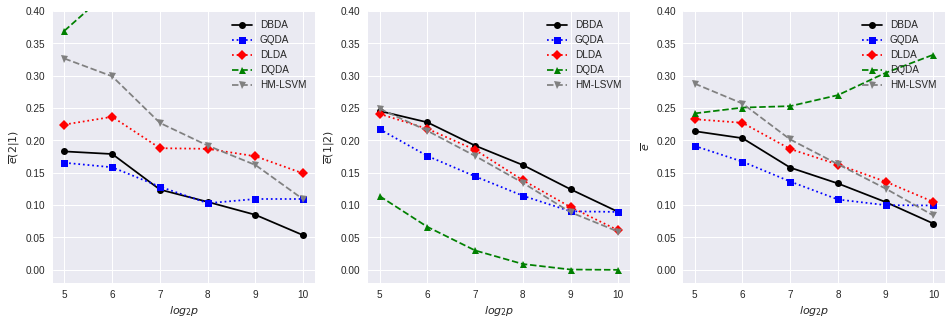

In [6]:
error2_1 = np.zeros((N_classifier, N_dim))
error1_2 = np.zeros((N_classifier, N_dim))
error = np.zeros((N_classifier, N_dim))
for i in range(N_dim):
    for j in range(N_classifier):
        error2_1[j, i] = 1 - result[i, j, 0] / iter
        error1_2[j, i] = 1 - result[i, j, 1] / iter
        error[j, i] = 1 - (result[i, j, 0] + result[i, j, 1]) / (2*iter)

pl = np.arange(5, 11, 1)

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(131)
ax1.plot(pl, error2_1[0], 'o-', color='black', label='DBDA')
ax1.plot(pl, error2_1[1], 's:', color='blue', label='GQDA')
ax1.plot(pl, error2_1[2], 'D:', color='red', label='DLDA')
ax1.plot(pl, error2_1[3], '^--', color='green', label='DQDA')
ax1.plot(pl, error2_1[4], 'v--', color='gray', label='HM-LSVM')
ax1.set_ylim(-0.02, 0.4)
ax1.legend()
ax1.set_ylabel('$\overline{e}(2|1)$')
ax1.set_xlabel('$log_2p$')

ax2 = fig.add_subplot(132)
ax2.plot(pl, error1_2[0], 'o-', color='black', label='DBDA')
ax2.plot(pl, error1_2[1], 's:', color='blue', label='GQDA')
ax2.plot(pl, error1_2[2], 'D:', color='red', label='DLDA')
ax2.plot(pl, error1_2[3], '^--', color='green', label='DQDA')
ax2.plot(pl, error1_2[4], 'v--', color='gray', label='HM-LSVM')
ax2.set_ylim(-0.02, 0.4)
ax2.legend()
ax2.set_ylabel('$\overline{e}(1|2)$')
ax2.set_xlabel('$log_2p$')


ax3 = fig.add_subplot(133)
ax3.plot(pl, error[0], 'o-', color='black', label='DBDA')
ax3.plot(pl, error[1], 's:', color='blue', label='GQDA')
ax3.plot(pl, error[2], 'D:', color='red', label='DLDA')
ax3.plot(pl, error[3], '^--', color='green', label='DQDA')
ax3.plot(pl, error[4], 'v--', color='gray', label='HM-LSVM')
ax3.set_ylim(-0.02, 0.4)
ax3.legend(loc='upper right')
ax3.set_ylabel('$\overline{e}$')
ax3.set_xlabel('$log_2p$')

plt.show()

## Figure 3

$(b):\mu_1 = (0, \ldots, 0, 1, \ldots, 1)^T$

$p=500, (c_1, c_2)=(0.8, 1.2), (n_1, n_2)=(10, 20)$ and $\mu = 10(10)60$ for (b)

In [0]:
np.random.seed(0)
t1 = time.time()
n = [10, 20]
c = [0.8, 1.2]
p = 500

N_class = 2
N_df = 6
N_classifier = 5
iter = 2000

y = [-1] * n[0] + [1] * n[1]
svm = SVC(C=float('inf'), kernel='linear')
result = np.zeros((N_df, N_classifier, N_class))

mu = []
mu.append(np.r_[np.zeros(p - int(np.ceil(p**(2/3)))), np.ones(int(np.ceil(p**(2/3))))])
mu.append(np.zeros(p))

S = np.zeros((p, p))
for i in range(p):
  for j in range(p):
    S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)
        
Sigma=[]
for i in range(N_class):
  Sigma.append(c[i] * S)

P, Q = [], []
for i in range(N_class):
  value, vec = la.eig(Sigma[i])
  P.append(np.sqrt(value)); Q.append(vec.T)



for v in range(6):
  df = (v+1)*10
  print('Degrees:{}'.format(df))
  print('Calculating...')

  mo = t.stats(df, moments='mv')

  for l in range(iter):
    x, trS, mean = [], [], []
    diag = []
    Y = []
    for i in range(N_class):
      Z = np.array([P[i] * (np.random.normal(0, 1, p)) for j in range(n[i])])
      X = np.dot(Z, Q[i]) / np.sqrt(np.random.chisquare(df, n[i]) / df).reshape(n[i], -1) + mu[i]
      Y.append(X)
      cov = np.cov(X, rowvar=False)
      trS.append(np.trace(cov))
      mean.append(np.mean(X, axis=0))
      diag.append(np.diag(cov))

      # creat new date
      z = P[i] * (np.random.normal(0, 1, p))
      x.append(np.dot(z, Q[i])  / np.sqrt(np.random.chisquare(df, 1) / df) + mu[i])



    #(3)DBDA
    for i in range(N_class):
      classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
      if (-1)**i * classifier < 0:
        result[v, 0, i] += 1


    #(6)GQDA
    for i in range(N_class):
      classifier = p*la.norm(x[i] - mean[0])**2 / trS[0] - p * la.norm(x[i] - mean[1])**2 / trS[1] - p * np.log(trS[1] / trS[0]) - p / n[0] + p / n[1]
      if (-1)**i * classifier < 0:
        result[v, 1, i] += 1

    #DLDA
    S_d_inv = np.diag((((n[0] - 1) * diag[0] + (n[1] - 1) * diag[1]) / (n[0] + n[1] - 2))**(-1))
    for i in range(N_class):
      classifier = np.einsum('i, ij, j', x[i] - (mean[0] + mean[1]) / 2, S_d_inv, mean[1] - mean[0])
      if (-1)**i * classifier < 0:
        result[v, 2, i] +=1

    #DQDA
    S_d0_inv = np.diag(diag[0]**(-1)); S_d1_inv = np.diag(diag[1]**(-1))
    for i in range(N_class):
      classifier = np.einsum('i, ij, j', x[i] - mean[0], S_d0_inv, x[i] - mean[0]) - np.einsum('i, ij, j', x[i] - mean[1], S_d1_inv, x[i] - mean[1]) \
                        - np.sum(np.log(diag[1])) + np.sum(np.log(diag[0]))
      if (-1)**i * classifier < 0:
        result[v, 3, i] += 1

    #HM-LSVM
    Y = np.r_[Y[0], Y[1]]
    svm.fit(Y, y)
    for i in range(N_class):
      classifier = svm.predict([x[i]])
      if (-1)**i * classifier < 0:
        result[v, 4, i] += 1

  print('Result')
  print('DBDA: (class1, class2) = ({}, {})'.format(result[v, 0, 0], result[v, 0, 1]))
  print('GQDA: (class1, class2) = ({}, {})'.format(result[v, 1, 0], result[v, 1, 1]))
  print('DLDA: (class1, class2) = ({}, {})'.format(result[v, 2, 0], result[v, 2, 1]))
  print('DQDA: (class1, class2) = ({}, {})'.format(result[v, 3, 0], result[v, 3, 1]))
  print('HM-LSVM: (class1, class2) = ({}, {})'.format(result[v, 4, 0], result[v, 4, 1]))
  print('Finished')
  print('')

t2 = time.time() - t1
print('Calculation time:{: .3f}'.format(t2))

Degrees:10
Calculating...
Result
DBDA: (class1, class2) = (1827.0, 1719.0)
GQDA: (class1, class2) = (1658.0, 1598.0)
DLDA: (class1, class2) = (1595.0, 1769.0)
DQDA: (class1, class2) = (899.0, 1929.0)
HM-LSVM: (class1, class2) = (1673.0, 1778.0)
Finished

Degrees:20
Calculating...
Result
DBDA: (class1, class2) = (1848.0, 1742.0)
GQDA: (class1, class2) = (1760.0, 1817.0)
DLDA: (class1, class2) = (1649.0, 1805.0)
DQDA: (class1, class2) = (780.0, 1992.0)
HM-LSVM: (class1, class2) = (1690.0, 1809.0)
Finished

Degrees:30
Calculating...
Result
DBDA: (class1, class2) = (1846.0, 1737.0)
GQDA: (class1, class2) = (1799.0, 1834.0)
DLDA: (class1, class2) = (1654.0, 1790.0)
DQDA: (class1, class2) = (769.0, 1996.0)
HM-LSVM: (class1, class2) = (1700.0, 1808.0)
Finished

Degrees:40
Calculating...
Result
DBDA: (class1, class2) = (1849.0, 1734.0)
GQDA: (class1, class2) = (1853.0, 1854.0)
DLDA: (class1, class2) = (1666.0, 1788.0)
DQDA: (class1, class2) = (726.0, 1997.0)
HM-LSVM: (class1, class2) = (1707.0

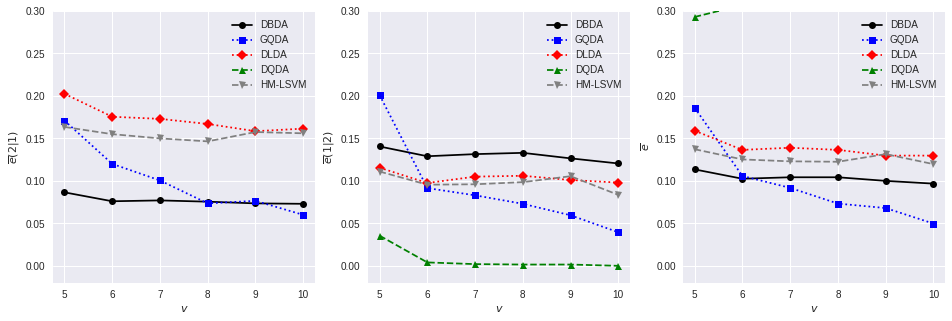

In [0]:
error2_1 = np.zeros((N_classifier, N_dim))
error1_2 = np.zeros((N_classifier, N_dim))
error = np.zeros((N_classifier, N_dim))
for i in range(N_df):
    for j in range(N_classifier):
        error2_1[j, i] = 1 - result[i, j, 0] / iter
        error1_2[j, i] = 1 - result[i, j, 1] / iter
        error[j, i] = 1 - (result[i, j, 0] + result[i, j, 1]) / (2*iter)
        
error = [error2_1, error1_2, error]
title_list = ['$\overline{e}(2|1)$', '$\overline{e}(1|2)$', '$\overline{e}$']

plt.figure(figsize=(16,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(pl, error[i][0], 'o-', color='black', label='DBDA')
    plt.plot(pl, error[i][1], 's:', color='blue', label='GQDA')
    plt.plot(pl, error[i][2], 'D:', color='red', label='DLDA')
    plt.plot(pl, error[i][3], '^--', color='green', label='DQDA')
    plt.plot(pl, error[i][4], 'v--', color='gray', label='HM-LSVM')
    plt.ylim(-0.02, 0.3)
    plt.legend(loc='upper right')
    plt.ylabel(title_list[i])
    plt.xlabel('$v$')

plt.show()